Este proyecto consiste en un proyecto para poner en práctica los distintos modelos de machine learnign para predecir ventas

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos
data = pd.read_excel("Base de datos de Manjar.xlsx")

## Análisis exploratorio

Revisamos las 3 primeras filas de nuestro dataset

In [71]:
data.head(3)

,agno,mes,upc,descri_item,Vta_Uni,Vta_Pesos,Vta_Kg,EMPRESA,categoria,fabricante,marca,Gramaje,Empaque,SEGMENTO,VARIEDAD,CADENA,ZONAS
0,2018,8,78040519,SOPROLE MANJAR ACARAMELADO PT PL 200 SOPROLE,180.0,134835.0,36.00,RETAILER B,DULCE DE LECHE,SOPROLE,SOPROLE,200,POTE,MANJAR,REGULAR,CADENA B,Z10 CONCEPCION
1,2021,1,7804000001332,ECKART DULCE DE LECHE SIN LACTOSA POTE PL 380 ...,192.0,472371.0,72.96,RETAILER C,DULCE DE LECHE,ECKART ALIMENTOS SPA,ECKART,380,POTE,DULCE DE LECHE,SIN LACTOSA,CADENA C1,Z11 ZONA SUR
2,2018,6,78003095,NESTLE EL MANJAR.POT. 400 NESTLE,1455.0,1486872.0,582.00,RETAILER A,DULCE DE LECHE,NESTLE,NESTLE,400,POTE,MANJAR,REGULAR,CADENA A1,Z2 ANTOFAGASTA


Revisamos cuantas filas y columnas tiene nuestra data

In [72]:
data.shape

(170152, 17)

Vemos nuestras columnas, cantidad de datos no nulos y los tipos de datos

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170152 entries, 0 to 170151
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   agno         170152 non-null  int64  
 1   mes          170152 non-null  int64  
 2   upc          170152 non-null  int64  
 3   descri_item  170152 non-null  object 
 4   Vta_Uni      170152 non-null  float64
 5   Vta_Pesos    170152 non-null  float64
 6   Vta_Kg       170152 non-null  float64
 7   EMPRESA      170152 non-null  object 
 8   categoria    170152 non-null  object 
 9   fabricante   170152 non-null  object 
 10  marca        170152 non-null  object 
 11  Gramaje      170152 non-null  int64  
 12  Empaque      170152 non-null  object 
 13  SEGMENTO     170152 non-null  object 
 14  VARIEDAD     170152 non-null  object 
 15  CADENA       170152 non-null  object 
 16  ZONAS        170152 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 22.1+ MB


Vemos un análisis descriptivo de las columnas numéricas

In [74]:
data.describe()

,agno,mes,upc,Vta_Uni,Vta_Pesos,Vta_Kg,Gramaje
count,170152.000000,170152.000000,1.701520e+05,170152.000000,1.701520e+05,170152.000000,170152.000000
mean,2018.932507,6.318692,6.558602e+12,563.877856,9.535582e+05,345.737104,618.176513
std,1.397662,3.371751,2.823097e+12,2012.152345,3.035358e+06,1345.829732,455.071012
min,2017.000000,1.000000,0.000000e+00,1.000000,1.000000e+00,0.190000,190.000000
25%,2018.000000,3.000000,7.791058e+12,45.000000,8.781575e+04,23.000000,400.000000
50%,2019.000000,6.000000,7.802920e+12,163.000000,2.876440e+05,85.600000,500.000000
75%,2020.000000,9.000000,7.802950e+12,481.000000,8.204415e+05,258.400000,1000.000000
max,2021.000000,12.000000,7.896043e+12,189477.000000,2.106687e+08,105452.000000,9600.000000


Vemos la cantidad de datos únicos que tiene cada columna

In [75]:
data.nunique()

agno                5
mes                12
upc                98
descri_item        98
Vta_Uni          6492
Vta_Pesos      146376
Vta_Kg          13951
EMPRESA             3
categoria           1
fabricante         18
marca              20
Gramaje            26
Empaque             6
SEGMENTO            2
VARIEDAD            7
CADENA              5
ZONAS              16
dtype: int64

Comprobamos que no hayan nulos en nuestra data

In [76]:
data.isnull().sum()

agno           0
mes            0
upc            0
descri_item    0
Vta_Uni        0
Vta_Pesos      0
Vta_Kg         0
EMPRESA        0
categoria      0
fabricante     0
marca          0
Gramaje        0
Empaque        0
SEGMENTO       0
VARIEDAD       0
CADENA         0
ZONAS          0
dtype: int64

Revisamos la cantidad de datos duplicados

In [77]:
data.duplicated().sum()

81

## Preparación de los datos

### Paso 1: Eliminar columnas no necesarias y valores duplicados

La columna categoría es una columna que solo tiene un dato único por lo cual no nos aporta información para el modelo

In [78]:
#Eliminamos nuestra columna
data = data.drop(columns=['categoria'])

La columna Fabricante y Marca si bien no son iguales suelen ser similares, por lo cual dejaremos Marca que entrega mayor información

In [79]:
data = data.drop(columns=['fabricante'])

Pór último eliminaremos las columnas Vta_Uni y Vta_Kg, ya que son columnas que están directamente relacionada con Vta_Pesos y son columnas que no obtendríamos al intentar predecir ventas.

In [80]:
data = data.drop(columns=['Vta_Uni','Vta_Kg'])

Un UPC corresponde a un Item(descri_item), por lo cual podemos eliminar una de las dos columnas

In [81]:
data = data.drop(columns=['upc'])

Ahora por otro lado, eliminaremos las filas duplicadas

In [82]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170069 entries, 0 to 170151
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   agno         170069 non-null  int64  
 1   mes          170069 non-null  int64  
 2   descri_item  170069 non-null  object 
 3   Vta_Pesos    170069 non-null  float64
 4   EMPRESA      170069 non-null  object 
 5   marca        170069 non-null  object 
 6   Gramaje      170069 non-null  int64  
 7   Empaque      170069 non-null  object 
 8   SEGMENTO     170069 non-null  object 
 9   VARIEDAD     170069 non-null  object 
 10  CADENA       170069 non-null  object 
 11  ZONAS        170069 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 16.9+ MB


### Paso 2: Tratamiento de valores nulos

En este caso la data que tenemos para este proyecto está limpia de datos nulos

In [83]:
data.isnull().sum()

agno           0
mes            0
descri_item    0
Vta_Pesos      0
EMPRESA        0
marca          0
Gramaje        0
Empaque        0
SEGMENTO       0
VARIEDAD       0
CADENA         0
ZONAS          0
dtype: int64

### Paso 3: Tratamiento de Outliers

La única variable numérica del dataset es venta pesos (agno y mes se comportan como variables categoricas). Por lo cual, graficaremos solo esta variable

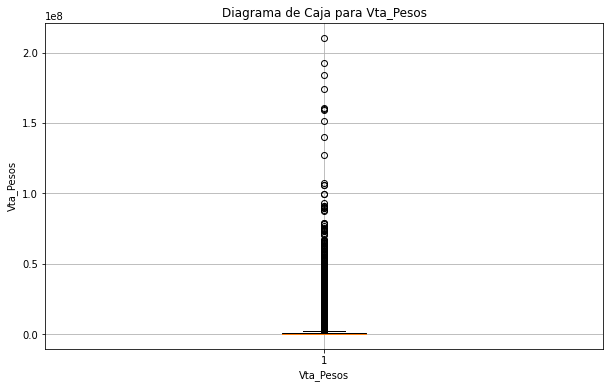

In [84]:
plt.figure(figsize=(10, 6))
plt.boxplot(data["Vta_Pesos"])
plt.title('Diagrama de Caja para Vta_Pesos')
plt.ylabel('Vta_Pesos')
plt.xlabel('Vta_Pesos')
plt.grid(True)
plt.show()

En las variables categóricas podemos ver las categorías que son infrecuentes en comparación con otras.

In [85]:
data['agno'].value_counts()

2018    35637
2017    35475
2020    34826
2019    33973
2021    30158
Name: agno, dtype: int64

### Paso 4: Convertir variables categóricas a Dummies (Antes extraer fecha si es necesario)

In [53]:
data = pd.get_dummies(data, columns=["agno", "mes", "descri_item","EMPRESA","marca","Gramaje","Empaque","SEGMENTO","VARIEDAD","CADENA","ZONAS"])
data.shape

(170069, 201)

### Paso 5: Normalizar variables numéricas

In [56]:
# Seleccionar las columnas numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Normalización de los datos numéricos
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

## Selección de variables

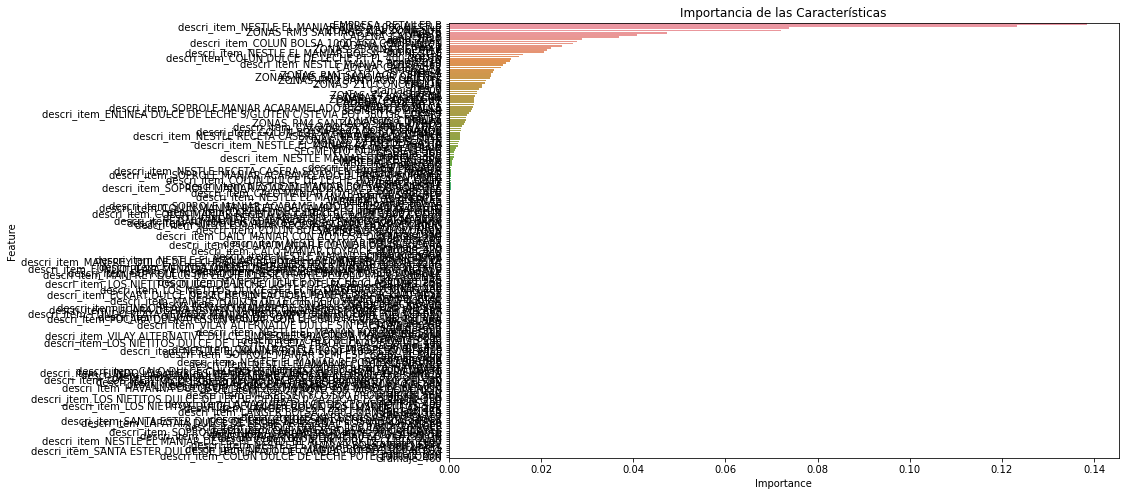

In [62]:
import seaborn as sns

all_columns = data.columns.tolist()
selected_features = [col for col in all_columns if col != 'Vta_Pesos']

# Crear y entrenar el modelo de regresión con árboles de decisión
X = data.drop('Vta_Pesos', axis=1)
y = data['Vta_Pesos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.show()

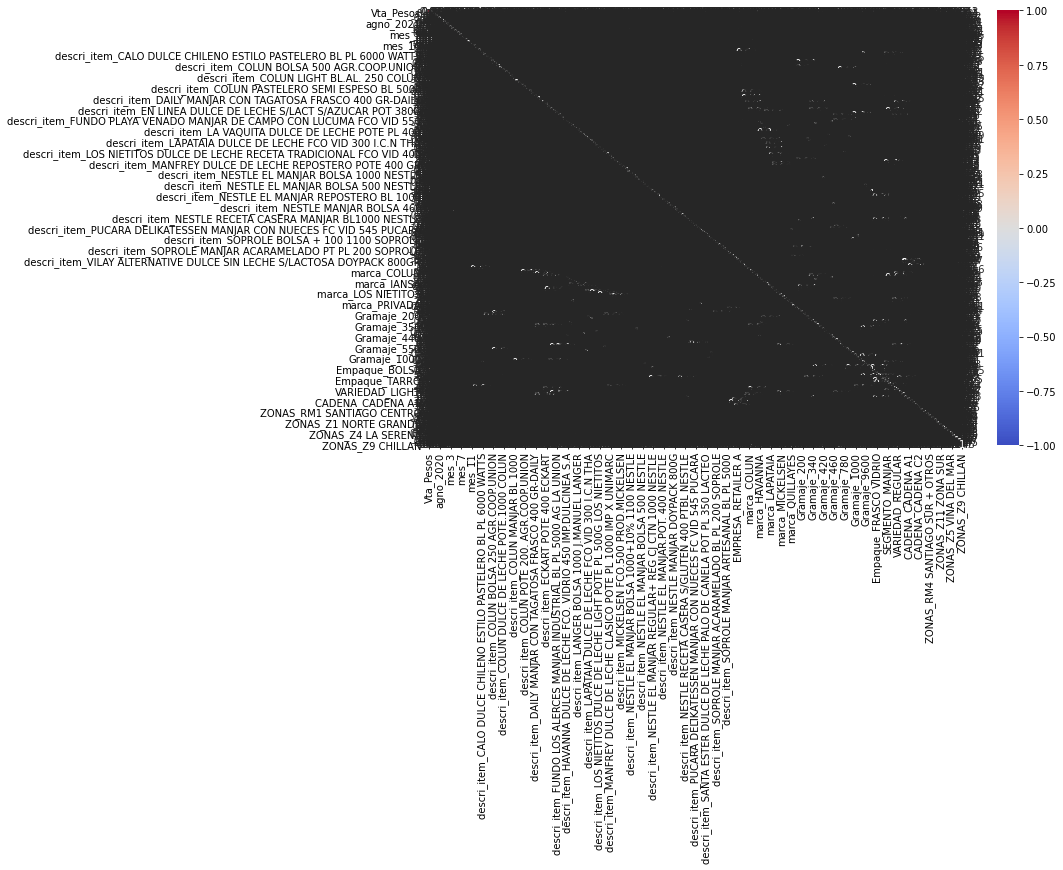

In [63]:
correlation_matrix = data[all_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [58]:
# Seleccionar las características y la variable objetivo
X = data.drop(columns=['Vta_Pesos'])
y = data['Vta_Pesos']

## Desarrollo y evaluación del modelo

In [59]:
# Primero deberíamos seleccionar las características y la variable objetivo
# Pero ya fueron seleccionadas en el paso anterior

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = linear_model.predict(X_test)

# Calcular métricas
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)

print(f'Linear Regression R2: {linear_r2}')
print(f'Linear Regression MAE: {linear_mae}')

Linear Regression R2: -1.2340556519046117e+19
Linear Regression MAE: 278561.2039363694


In [60]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from six import StringIO
import pydotplus

def display_tree(dt):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())


# Primero deberíamos seleccionar las características y la variable objetivo
# Pero ya fueron seleccionadas en el paso anterior

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

tree = DecisionTreeRegressor(random_state=21, max_depth=20)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)


tree_r2 = r2_score(y_test, y_pred)
tree_mae = mean_absolute_error(y_test, y_pred)

print(f'Decision Tree R2: {tree_r2}')
print(f'Decision Tree MAE: {tree_mae}')

Decision Tree R2: 0.20462176857305325
Decision Tree MAE: 0.0031553334361040094


In [61]:
from sklearn.ensemble import RandomForestRegressor


# Primero deberíamos seleccionar las características y la variable objetivo
# Pero ya fueron seleccionadas en el paso anterior


# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test_scaled)

# Calcular métricas
rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)

print(f'Random Forest R2: {rf_r2}')
print(f'Random Forest MAE: {rf_mae}')

Random Forest R2: 0.24045372629488426
Random Forest MAE: 0.0030626362028709077


## Reflexión